 ## Pizza Place Sales
 A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity,price and ingredients.
 
 ## Recommended Analysis
 * How many customers do we have each day? Are there any peak hours?
 * How many pizzas are typically in an order? Do we have any bestsellers?
 * How much money did we make this year? Can we identify any seasonality in the sales?
 * Are there any pizzas we should take off the menu, or any promotions we could leverage?
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# syntax for reading the content of the csv file

order = pd.read_csv('orders.csv')
order.head()

In [7]:
# syntax for reading the content of the order details file and storing it.

order_details = pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [13]:
 pizza = pd.read_csv('pizzas.csv')
pizza.head()


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [18]:
pizza_types = pd.read_csv('pizza_types.csv', encoding = 'latin')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [19]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [20]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [21]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [22]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [32]:
 # In combining all the tables, you must know their foreign keys and primary keys
    
print("Order: ", order.columns)
print("")
print("Order Details: ",order_details.columns)
print("")
print("Pizza: ",pizza.columns)
print("")
print("Pizza Types: ",pizza_types.columns)

Order:  Index(['order_id', 'date', 'time'], dtype='object')

Order Details:  Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

Pizza:  Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

Pizza Types:  Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [39]:
# Syntax for merging the tables

pizza_df = order.merge(order_details, on='order_id').merge(pizza, on='pizza_id').merge(pizza_types, on='pizza_type_id')
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [40]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [42]:
# Checking if there's any missing data
pizza_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [43]:
# 1.First convert the datatype of the date to date time instead of the object

In [45]:
pizza_df['date'] = pd.to_datetime(pizza_df['date'])

In [47]:
# Creating a new column to contain the day
pizza_df['day'] = pizza_df['date'].dt.dayofweek + 1

In [48]:
pizza_df['month'] = pizza_df['date'].dt.month

In [50]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1


In [52]:
pizza_df.day.unique()
pizza_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [55]:
pizza_df['hour'] = pd.to_datetime(pizza_df.time).dt.hour

C:\Users\User\AppData\Local\Temp\ipykernel_16976\2754557346.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_df['hour'] = pd.to_datetime(pizza_df.time).dt.hour


In [56]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1,11
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1,12
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1,14
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1,16
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1,20


In [57]:
day = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5:"Friday", 6: "Saturday", 7: "Sunday"}

In [60]:
pizza_df['day'] = pizza_df.day.map(day)

In [62]:
month= {1: "January", 2: "February", 3: "March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}

In [63]:
pizza_df.month = pizza_df.month.map(month)

In [68]:
pizza_df['sales'] = pizza_df.quantity * pizza_df.price

## Number of pizzas sold in a year

In [72]:
print("Total number of pizzas sold in a year = ", pizza_df.quantity.sum())

Total number of pizzas sold in a year =  49574


In [76]:
# Check if there's duplicate
pizza_df.duplicated().sum()

0

 ## Number of days the restaurant operated

In [79]:
pizza_df.date.duplicated().sum()

48262

In [88]:
print("The restaurant operated for: ", pizza_df[~pizza_df.date.duplicated()].count()[1], "days")

The restaurant operated for:  358 days


## Orders were placed in the year under review

In [89]:
print("The restaurant received : ", pizza_df[~pizza_df.order_id.duplicated()].count()[1], "orders")

The restaurant received :  21350 orders


## MONEY MADE

In [90]:
pizza_df.sales.sum()

817860.05

## BUSIEST DAYS

In [93]:
pizza_df.groupby('day')['quantity'].sum()

day
Friday       8242
Monday       6485
Saturday     7493
Sunday       6035
Thursday     7478
Tuesday      6895
Wednesday    6946
Name: quantity, dtype: int64

In [105]:
day_df = pd.DataFrame(pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)).reset_index()
day_df['qty_pct'] = round(day_df.quantity/day_df.quantity.sum()*100,2).astype(str) + '%'
day_df.head()

,day,quantity,qty_pct
0,Friday,8242,16.63%
1,Saturday,7493,15.11%
2,Thursday,7478,15.08%
3,Wednesday,6946,14.01%
4,Tuesday,6895,13.91%


In [102]:
day_df.quantity.sum()

49574

Text(0.5, 1.0, 'BUSIEST DAYS')

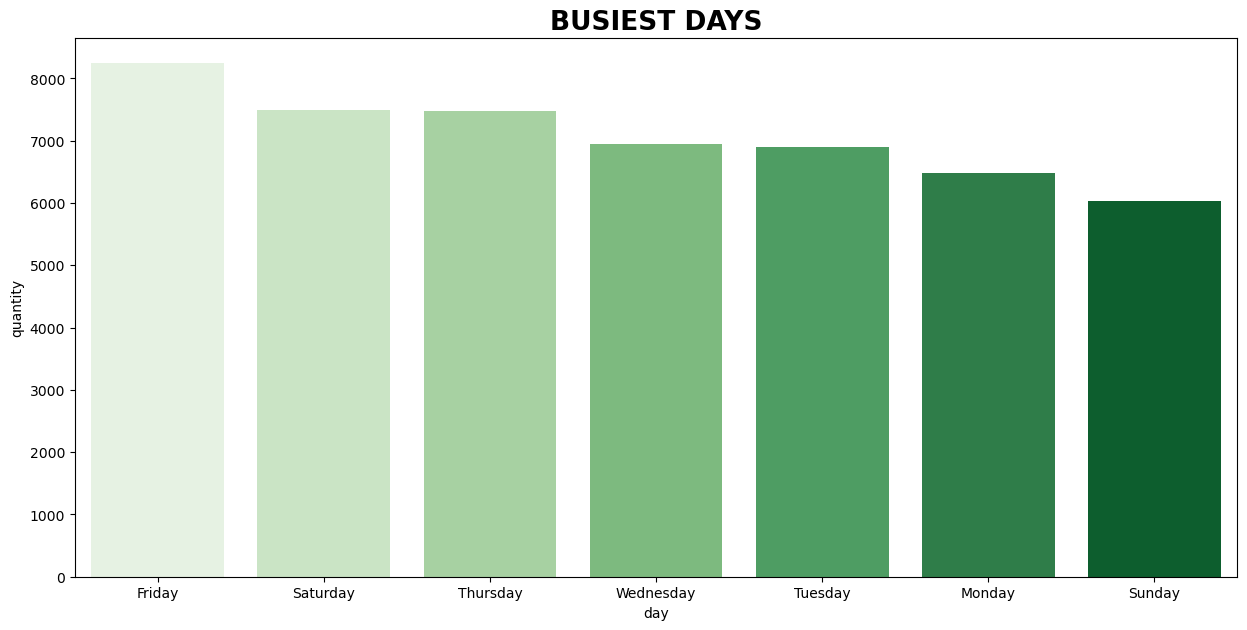

In [112]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_df, x='day', y='quantity', palette='Greens')
plt.title('BUSIEST DAYS', fontsize=19, fontweight='bold')

## Day they made more money

In [117]:
sale_df = pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()
sale_df['sales_pct'] = round(sale_df.sales/sale_df.sales.sum()*100,2).astype(str) + '%'
sale_df.head()

,day,sales,sales_pct
0,Friday,136073.9,16.64%
1,Thursday,123528.5,15.1%
2,Saturday,123182.4,15.06%
3,Wednesday,114408.4,13.99%
4,Tuesday,114133.8,13.96%


Text(0.5, 1.0, 'DAY MADE MORE MONEY')

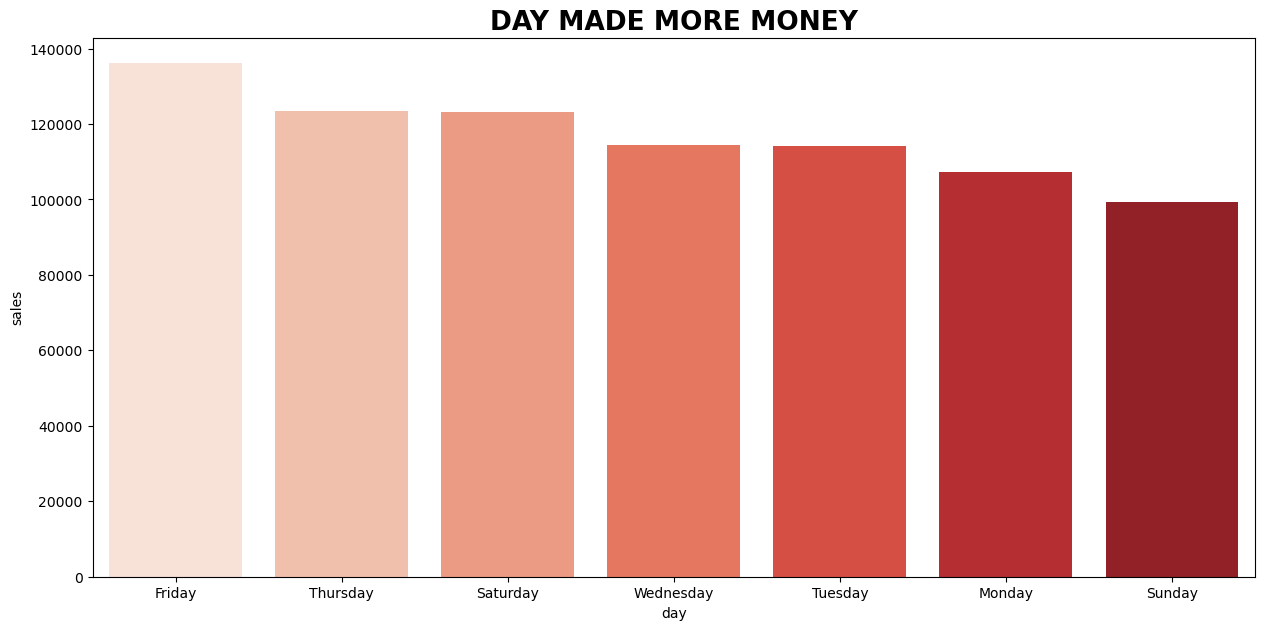

In [119]:
plt.figure(figsize=(15,7))
sns.barplot(data=sale_df, x='day', y='sales', palette='Reds')
plt.title('DAY MADE MORE MONEY', fontsize=19, fontweight='bold')

## DIFFERENT TYPES OF PIZZAS

In [133]:
print("There are",pizza_df.name.unique().size, "pizza types sold.")

There are 32 pizza types sold.


## TOP THREE SELLING PIZZAS

In [135]:
pizza_df.name.unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [146]:
pizza_rank = pd.DataFrame(pizza_df.groupby('name')['quantity'].sum().sort_values(ascending=False)).reset_index()
pizza_rank['pizza_rank_pct'] = round(pizza_rank.quantity/pizza_rank.quantity.sum()*100,2).astype(str) + '%'

# The top three selling pizzas are:
pizza_rank.head(3)

,name,quantity,pizza_rank_pct
0,The Classic Deluxe Pizza,2453,4.95%
1,The Barbecue Chicken Pizza,2432,4.91%
2,The Hawaiian Pizza,2422,4.89%


Text(0.5, 1.0, 'PIZZA RANKING')

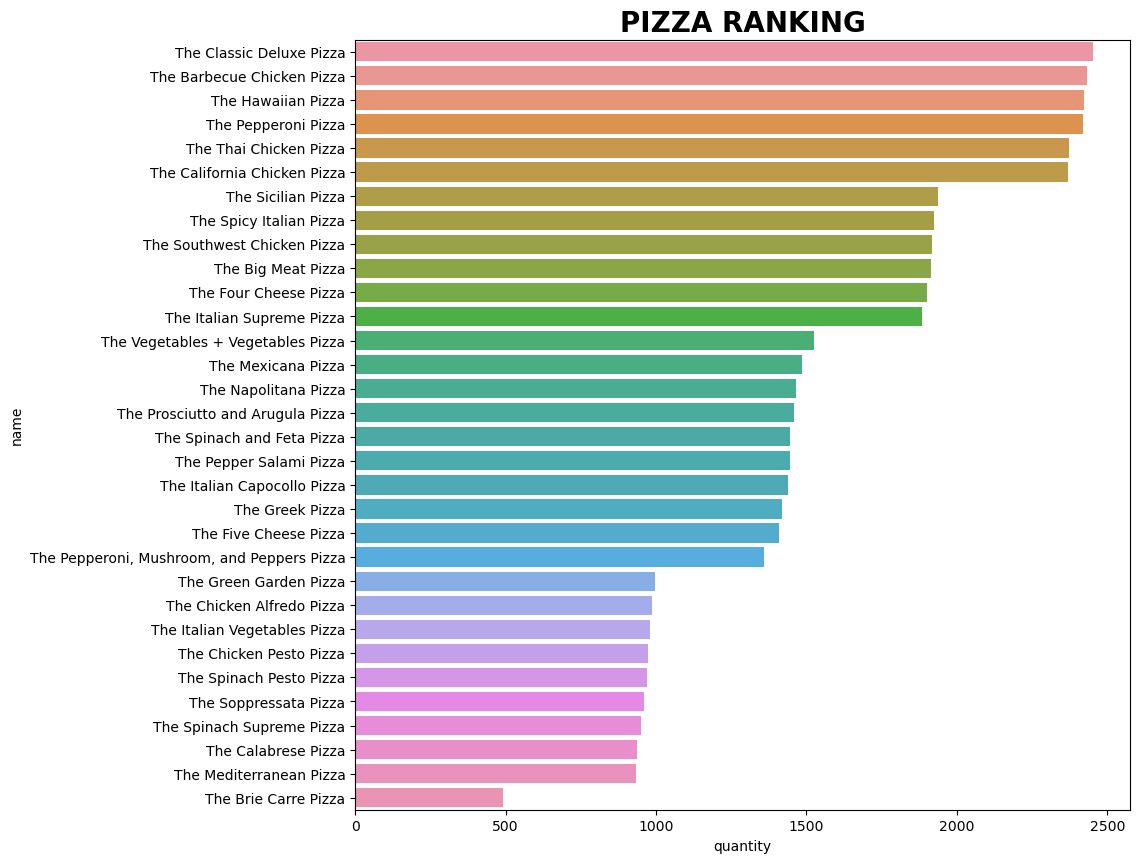

In [164]:
plt.figure(figsize=(10,10))
sns.barplot(data=pizza_rank, y='name', x='quantity',orient='h')
plt.title('PIZZA RANKING', fontsize=20, fontweight='bold')

## THE TOP THREE WORST SELLING

In [147]:
pizza_rank.tail(3)

,name,quantity,pizza_rank_pct
29,The Calabrese Pizza,937,1.89%
30,The Mediterranean Pizza,934,1.88%
31,The Brie Carre Pizza,490,0.99%


## TOP MOST PROFITABLE PIZZAS

In [167]:
profit = pd.DataFrame(pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)).reset_index()
profit['profit_pct'] = round(profit.sales/profit.sales.sum()*100,2).astype(str) + '%'

# The top three selling pizzas are:
profit.head(3)

,name,sales,profit_pct
0,The Thai Chicken Pizza,43434.25,5.31%
1,The Barbecue Chicken Pizza,42768.00,5.23%
2,The California Chicken Pizza,41409.50,5.06%


Text(0.5, 1.0, 'MOST PROFITABLE')

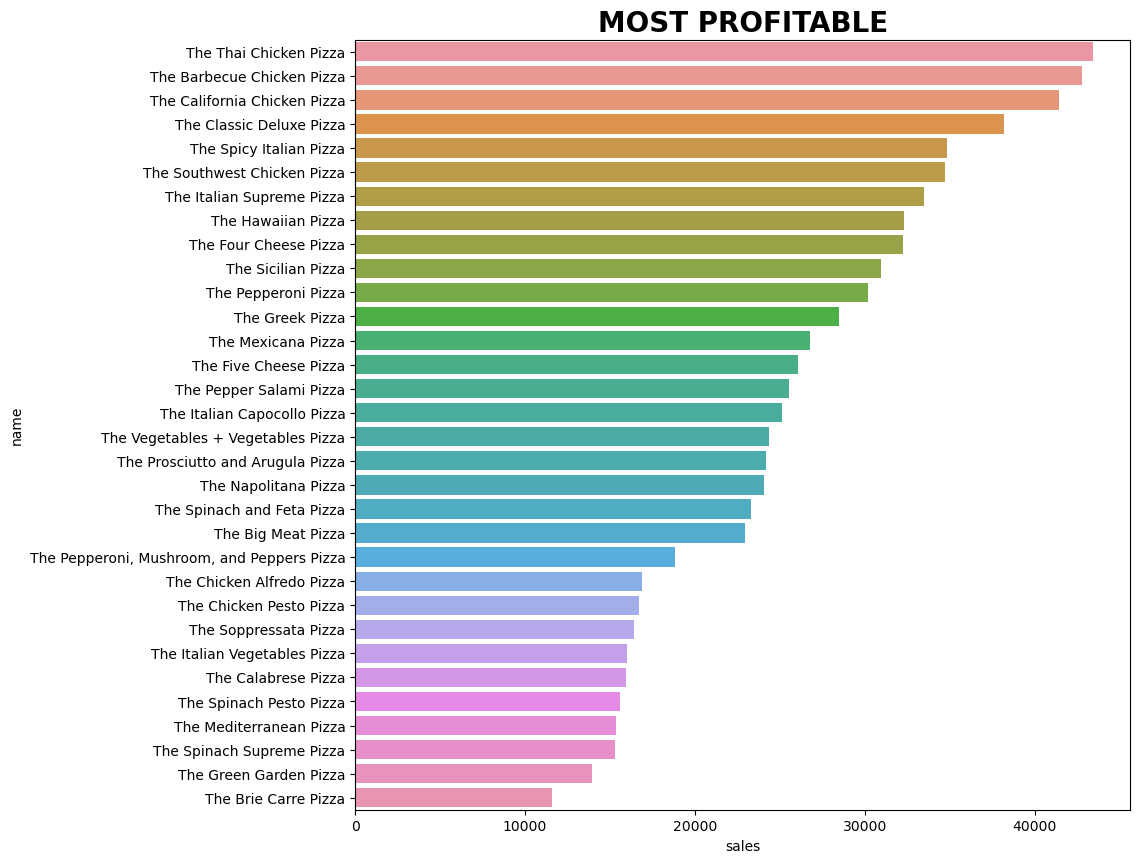

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(data=profit, y='name', x='sales',orient='h')
plt.title('MOST PROFITABLE', fontsize=20, fontweight='bold')

In [175]:
pizza_df.groupby('name')[['quantity','sales']].sum().reset_index().sort_values(by=['sales','quantity'],ascending=False)

,name,quantity,sales
30,The Thai Chicken Pizza,2371,43434.25
0,The Barbecue Chicken Pizza,2432,42768.00
4,The California Chicken Pizza,2370,41409.50
7,The Classic Deluxe Pizza,2453,38180.50
26,The Spicy Italian Pizza,1924,34831.25
25,The Southwest Chicken Pizza,1917,34705.75
14,The Italian Supreme Pizza,1884,33476.75
12,The Hawaiian Pizza,2422,32273.25
9,The Four Cheese Pizza,1902,32265.70
23,The Sicilian Pizza,1938,30940.50


In [183]:
size_df = pizza_df.groupby('size')[['quantity','sales']].sum().reset_index()
size_df['Percentage_Sales'] = round(size_df['sales']/size_df.sales.sum()*100,2).astype(str) + '%'
size_df['Percentage_Qty']= round(size_df['quantity']/size_df.quantity.sum()*100,2).astype(str) + '%'
size_df.head()

,size,quantity,sales,Percentage_Sales,Percentage_Qty
0,L,18956,375318.70,45.89%,38.24%
1,M,15635,249382.25,30.49%,31.54%
2,S,14403,178076.50,21.77%,29.05%
3,XL,552,14076.00,1.72%,1.11%
4,XXL,28,1006.60,0.12%,0.06%


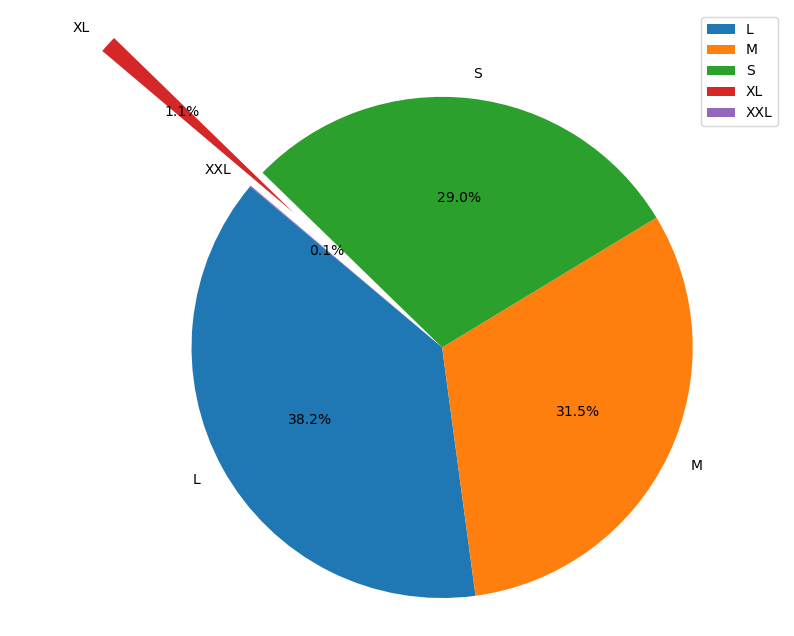

In [208]:
size_df['Percentage_Qty']= round(size_df['quantity']/size_df.quantity.sum()*100,2)
sizes = size_df.Percentage_Qty.astype(float)
labels = ['L','M','S','XL','XXL']

plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=[0,0,0,0.8,0])
plt.axis('equal');

plt.legend()
plt.show()


In [215]:
heat = pizza_df.groupby(['day','hour'])['quantity'].sum().unstack('hour')

<Axes: xlabel='hour', ylabel='day'>

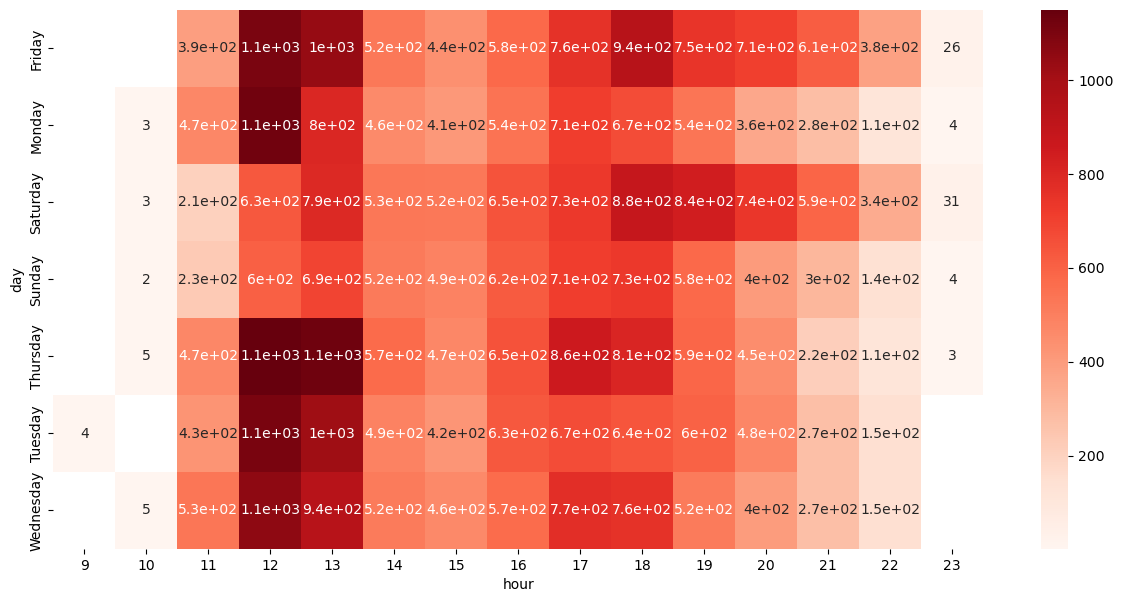

In [222]:
plt.figure(figsize=(15,7))
sns.heatmap(heat, annot=True, cmap='Reds')